# Import libraries

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load the Dataset

In [52]:
data = pd.read_csv("data.csv")

# Display first 5 rows
data.head()

data.info



<bound method DataFrame.info of       Patient_Number  Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
0                  1                           1                11.28   
1                  2                           0                 9.75   
2                  3                           1                10.79   
3                  4                           0                11.00   
4                  5                           1                14.17   
...              ...                         ...                  ...   
1995            1996                           1                10.14   
1996            1997                           1                11.77   
1997            1998                           1                16.91   
1998            1999                           0                11.15   
1999            2000                           1                11.36   

      Genetic_Pedigree_Coefficient  Age  BMI  Sex  Pregnancy  Smoking  \
0                 

# Data Understanding

In [53]:
# Shape (rows, columns)
data.shape

# Column names
data.columns

# Statistical summary
data.describe()

# Check missing values
data.isnull().sum()

# Check duplicates
data.duplicated().sum()


np.int64(0)

# Data Preprocessing

In [54]:
# Remove duplicates
data.drop_duplicates(inplace=True)

#Convert necessary columns to numeric
data = data.apply(pd.to_numeric, errors='ignore')

# Fill missing numeric values
data.fillna(data.mean(numeric_only=True), inplace=True)

# Check final structure
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   2000 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      2000 non-null   float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    2000 non-null   float64
 12  Level_of_Stress                2000 non-null   i

C:\Users\devik\AppData\Local\Temp\ipykernel_27400\3523434005.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


In [55]:
data.columns = data.columns.str.strip().str.lower()


In [58]:
data.columns

Index(['patient_number', 'blood_pressure_abnormality', 'level_of_hemoglobin',
       'genetic_pedigree_coefficient', 'age', 'bmi', 'sex', 'pregnancy',
       'smoking', 'physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'level_of_stress',
       'chronic_kidney_disease', 'adrenal_and_thyroid_disorders'],
      dtype='object')

# Feature Engineering

In [43]:
if "height" in data.columns and "weight" in data.columns:
    data["bmi"] = data["weight"] / ((data["height"] / 100) ** 2)


In [44]:
if "gender" in data.columns:
    data["gender"] = data["gender"].map({"Male": 1, "Female": 0})


# Define Features (X) and Target (y)

In [60]:
X = data.drop("blood_pressure_abnormality", axis=1)
y = data["blood_pressure_abnormality"]


# Train-Test Split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Feature Scaling


In [63]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train the Model (Linear Regression)

In [64]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Make Predictions

In [65]:
y_pred = model.predict(X_test_scaled)


# Model Evaluation

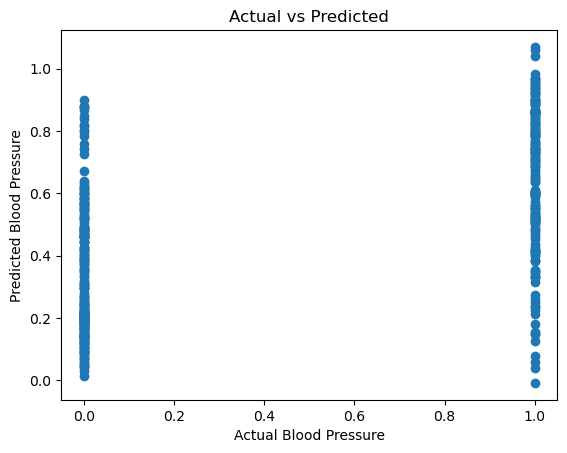

In [66]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Blood Pressure")
plt.ylabel("Predicted Blood Pressure")
plt.title("Actual vs Predicted")
plt.show()


In [72]:
pickle.dump(model, open("bp_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))